# Exemple de notes de laboratoire

Aujourd'hui je dois vraiment me forcer à prendre de belles notes afin de rentre mes résultats intelligible et reproductible. C'est nécessaire pour la science ! Mon fichier exemple est stocké dans le document disponible ici :

In [11]:
print("/home/work/module2/exo4/250715_qPCR_data_aggregated.xlsx")

/home/work/module2/exo4/050715_qPCR_data_aggregated.xlsx


In [16]:
#Visualiser les fichier dans le même répertoire que ce notebook
import os
print("Fichiers dans le dossier courant :")
print(os.listdir())

Fichiers dans le dossier courant :
['exercice_python_en.org', 'exercice_fr.ipynb', 'exercice_fr.Rmd', '250715_qPCR_data_aggregated.xlsx', 'exercice_python_fr.org', 'exercice_R_en.org', 'exercice_R_fr.org', 'exercice 2 partie 4.ipynb', 'exercice_en.Rmd', 'exercice_en.ipynb', '.ipynb_checkpoints']


In [17]:
#Importer le fichier et visualiser quelques lignes
import pandas as pd

# Nom du fichier (doit être identique à celui dans le dossier)
nom_fichier = '250715_qPCR_data_aggregated.xlsx'

# Lire le fichier Excel
try:
    df = pd.read_excel(nom_fichier)
    print("Premières lignes du fichier :")
    print(df.head())  # Affiche les 5 premières lignes
except Exception as e:
    print(f"Erreur : {e}. Vérifie que le nom du fichier est correct et qu'il est bien dans le dossier.")


Premières lignes du fichier :
   Lot           Sample Name  Collecte  Rep Target Name         Ct    Ct Mean
0    1                   ESC         1    1       DUXCL  33.252235  33.609188
1    1                   ESC         1    2       DUXCL  34.533466  33.609188
2    1                   ESC         1    3       DUXCL  33.041870  33.609188
3    1  pEF1amCherryDUXClong         1    1       DUXCL  21.982199  22.071215
4    1  pEF1amCherryDUXClong         1    2       DUXCL  22.086342  22.071215


In [20]:
# Commençons les stats ! Importons les packages importants
import numpy as np
import matplotlib.pyplot as plt
from math import *

Et maintenant, connaissons le nombre moyen de répétitions

In [24]:
# colonne à analyser
colonne = 'Rep'

# Calculer la moyenne (en ignorant l'en-tête automatiquement)
moyenne = df[colonne].mean()

print(f"Moyenne de répétitions (colonne '{colonne}') : {moyenne:.2f}")

Moyenne de répétitions (colonne 'Rep') : 1.96


Je veux maintenant connaître l'écart type moyen entre de toute l'expérience (on filtre par sample)

In [25]:
# Grouper par 'Sample Name' et calculer l'écart type de 'Ct' pour chaque groupe
ecart_type_par_groupe = df.groupby('Sample Name')['Ct'].std()

print("\nÉcart type de 'Ct' par 'Sample Name' :")
print(ecart_type_par_groupe)



Écart type de 'Ct' par 'Sample Name' :
Sample Name
ESC                              5.096469
pEF1amCherryDUXCcourt            5.420076
pEF1amCherryDUXClong             4.103212
pEF1artTAEGFPmCherryDUXCcourt    5.001891
Name: Ct, dtype: float64


In [26]:
# Calculer l'écart type moyen global
ecart_type_moyen = ecart_type_par_groupe.mean()

print(f"\nÉcart type moyen de 'Ct' pour tous les 'Sample Name' : {ecart_type_moyen:.4f}")



Écart type moyen de 'Ct' pour tous les 'Sample Name' : 4.9054


Je vais maintenant ploter l'écart type moyen (ordonnée) en fonction du sample (abscisse) en tracant avec une barre en pointillé l'écart type moyen en droite asymptotique

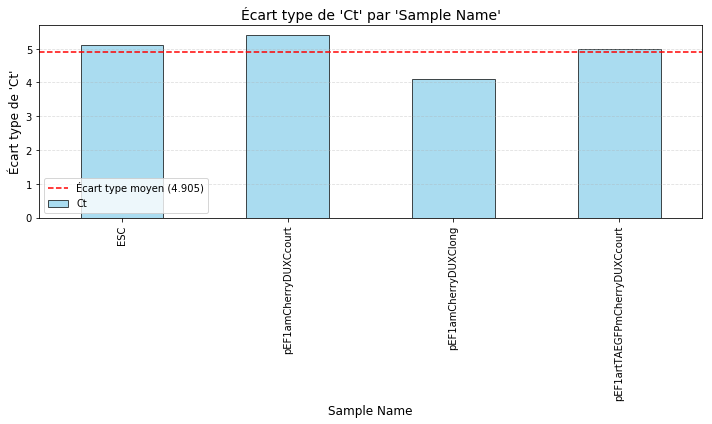

In [27]:
# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer les écarts types par groupe (barres ou points)
ecart_type_par_groupe.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter la ligne pointillée pour l'écart type moyen
plt.axhline(y=ecart_type_moyen, color='red', linestyle='--', linewidth=1.5, label=f'Écart type moyen ({ecart_type_moyen:.3f})')

# Personnaliser le graphique
plt.title("Écart type de 'Ct' par 'Sample Name'", fontsize=14)
plt.xlabel("Sample Name", fontsize=12)
plt.ylabel("Écart type de 'Ct'", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()
